In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Data Loading and Inspection

In [2]:
titanic = pd.read_csv("titanic/train.csv")

In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
titanic.describe(include='O')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Dooley, Mr. Patrick",male,347082,G6,S
freq,1,577,7,4,644


# Data Cleaning

In [7]:
print(titanic.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [8]:
round(titanic.isnull().mean(), 3) * 100

PassengerId     0.0
Survived        0.0
Pclass          0.0
Name            0.0
Sex             0.0
Age            19.9
SibSp           0.0
Parch           0.0
Ticket          0.0
Fare            0.0
Cabin          77.1
Embarked        0.2
dtype: float64

In [9]:
titanic['Age'] = titanic['Age'].fillna(titanic['Age'].median())

In [10]:
titanic.drop(columns=['Cabin'], inplace=True)

In [11]:
titanic['Embarked'] = titanic['Embarked'].fillna(titanic['Embarked'].mode()[0])

In [12]:
print(titanic.isnull().sum())


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [13]:
titanic = titanic.drop(['PassengerId', 'Ticket', 'Name'], axis=1)

### Survival Counts

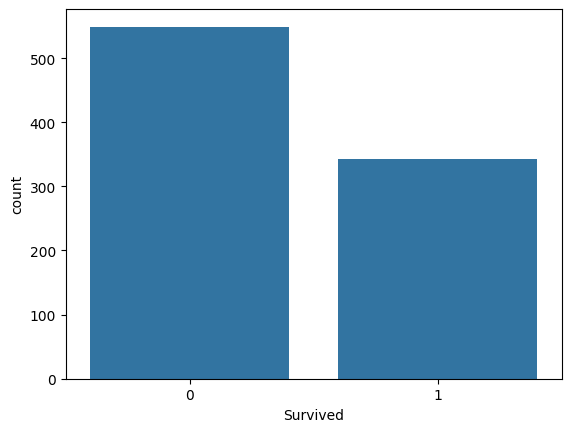

In [14]:
sns.countplot(x='Survived', data=titanic)
plt.show()

The Survived countplot shows that less than half of passengers survived

## Survival by Sex

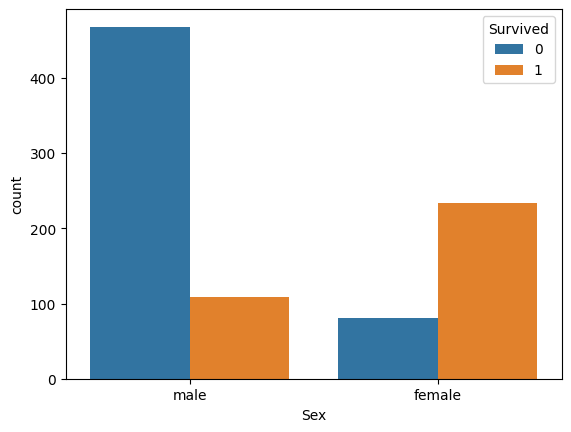

In [15]:
sns.countplot(x='Sex', hue='Survived', data=titanic)
plt.show()


From the Sex vs Survived plot: women had much higher survival rates than men.

## Survival by Passenger Class (Pclass)

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


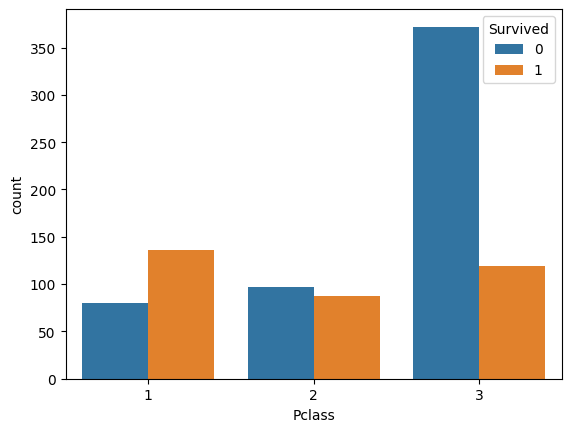

In [16]:
print(titanic.groupby('Pclass')['Survived'].mean())

sns.countplot(x='Pclass', hue='Survived', data=titanic)
plt.show()

First-class passengers had higher survival rates than those in lower classes, showing a class-based disparity in survival chances

## Age Distribution of Passengers

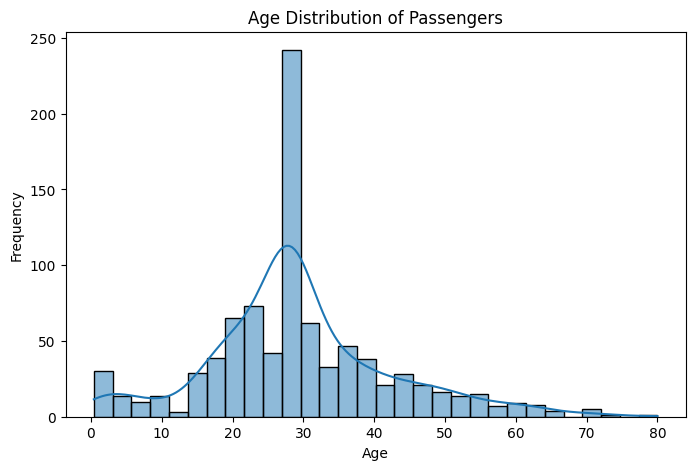

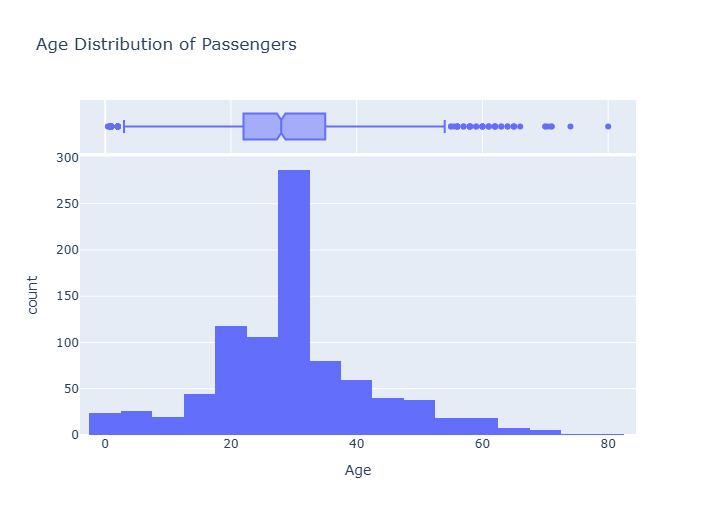

In [17]:
plt.figure(figsize=(8, 5))
sns.histplot(titanic['Age'], bins=30, kde=True)
plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

fig = px.histogram(titanic, x='Age', nbins=30, marginal="box", title='Age Distribution of Passengers', width=800, height=500)
fig.show()

Most passengers were young adults, with a significant number of children and elderly individuals.

## Survival by Age

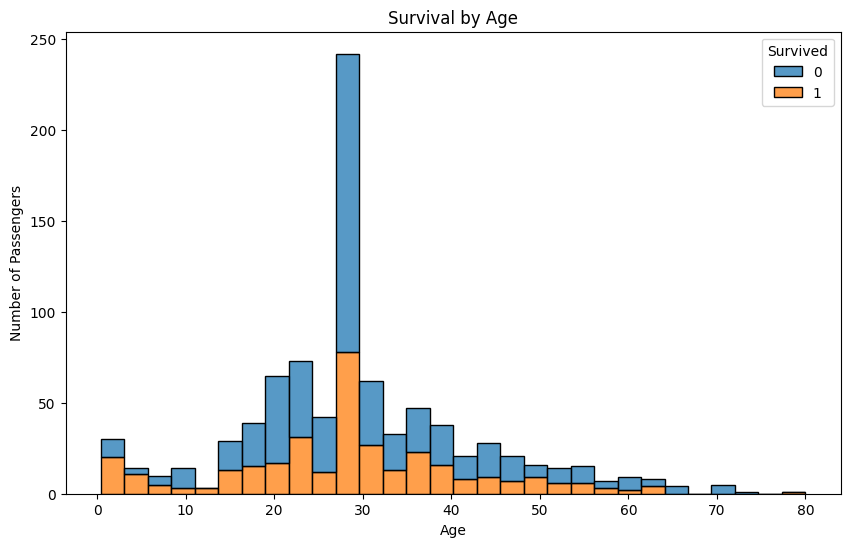

In [18]:
plt.figure(figsize=(10,6))
sns.histplot(data=titanic, x="Age", hue="Survived", bins=30, kde=False, multiple="stack")
plt.title("Survival by Age")
plt.xlabel("Age")
plt.ylabel("Number of Passengers")
plt.show()


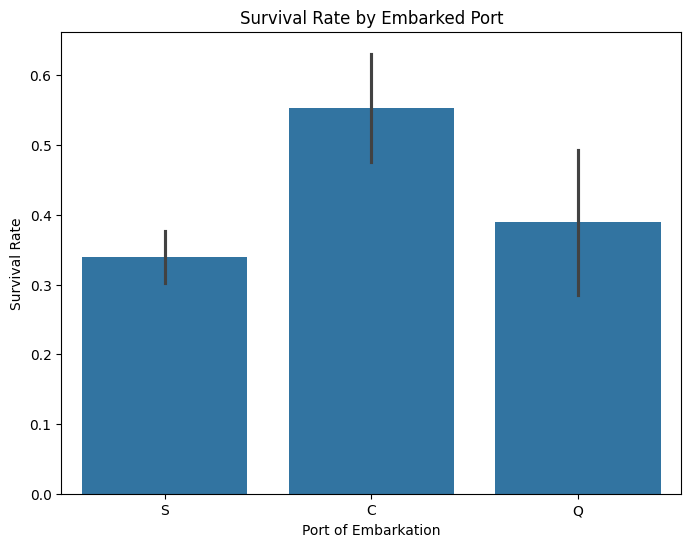

In [19]:
plt.figure(figsize=(8,6))
sns.barplot(x="Embarked", y="Survived", data=titanic, estimator=lambda x: sum(x)/len(x))
plt.title("Survival Rate by Embarked Port")
plt.xlabel("Port of Embarkation")
plt.ylabel("Survival Rate")
plt.show()


Passengers who embarked at certain towns had varying survival rates, potentially reflecting different socioeconomic backgrounds.

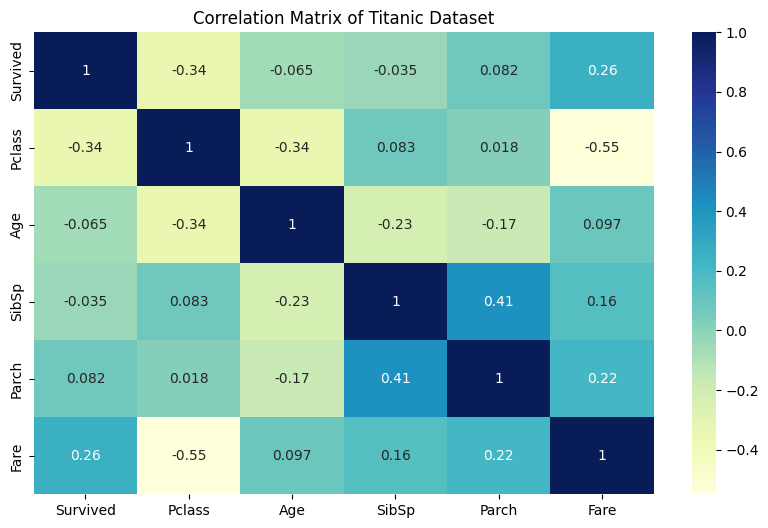

In [20]:
# Select only numerical columns for the correlation matrix
numerical_titanic = titanic.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
corr = numerical_titanic.corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='YlGnBu')
plt.title('Correlation Matrix of Titanic Dataset')
plt.show()

SibSp
0    0.345395
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5    0.000000
8    0.000000
Name: Survived, dtype: float64


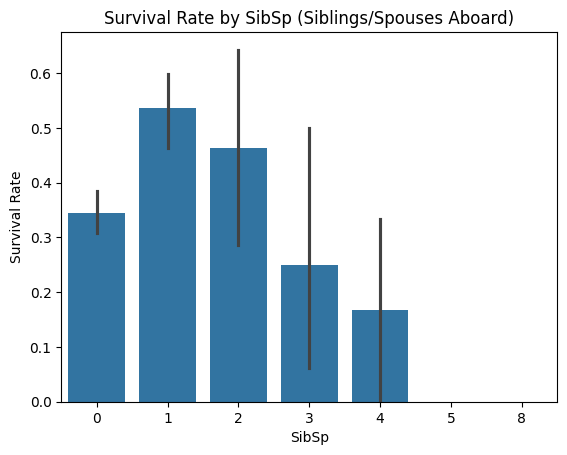

In [21]:
sibsp_survival = titanic.groupby('SibSp')['Survived'].mean()
print(sibsp_survival)

sns.barplot(x='SibSp', y='Survived', data=titanic)
plt.title("Survival Rate by SibSp (Siblings/Spouses Aboard)")
plt.ylabel("Survival Rate")
plt.show()


Moderate-sized groups (1–2 siblings/spouses aboard) improved survival, while being alone or in very large groups significantly reduced survival.

Parch
0    0.343658
1    0.550847
2    0.500000
3    0.600000
4    0.000000
5    0.200000
6    0.000000
Name: Survived, dtype: float64


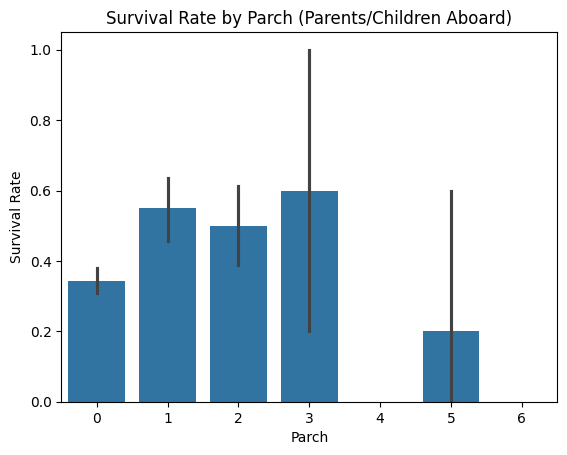

In [22]:
parch_survival = titanic.groupby('Parch')['Survived'].mean()
print(parch_survival)

sns.barplot(x='Parch', y='Survived', data=titanic)
plt.title("Survival Rate by Parch (Parents/Children Aboard)")
plt.ylabel("Survival Rate")
plt.show()


Small groups of parents/children significantly increased survival, similar to the SibSp analysis.

Large groups or passengers traveling completely alone were at the greatest risk.

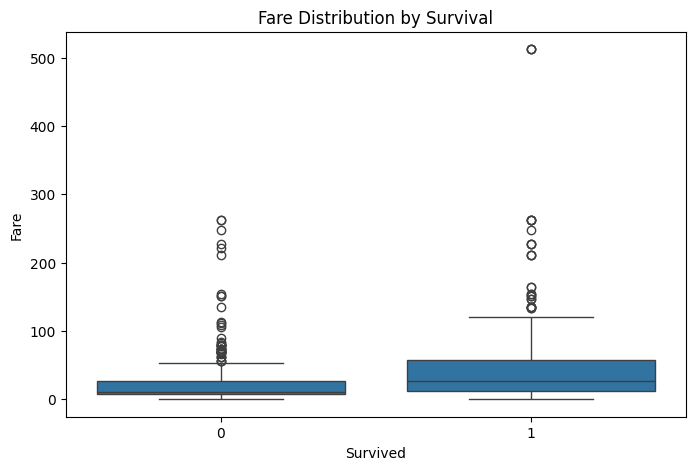

In [23]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Survived', y='Fare', data=titanic)
plt.title('Fare Distribution by Survival')
plt.xlabel('Survived')
plt.ylabel('Fare')
plt.show()


Fare is positively associated with survival. Higher paying passengers had higher chances of survival, while lower-paying passengers had lower chances.

# Feature Engineering

In [24]:
titanic['family_size'] = titanic['SibSp'] + titanic['Parch'] + 1
titanic['is_alone'] = np.where(titanic['family_size'] == 1, 1, 0)
titanic['Sex'] = titanic['Sex'].map({'male': 0, 'female': 1})
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,family_size,is_alone
0,0,3,0,22.0,1,0,7.2500,S,2,0
1,1,1,1,38.0,1,0,71.2833,C,2,0
2,1,3,1,26.0,0,0,7.9250,S,1,1
3,1,1,1,35.0,1,0,53.1000,S,2,0
4,0,3,0,35.0,0,0,8.0500,S,1,1


In [27]:
titanic['Family_group'] = pd.cut(titanic['family_size'], bins=[0, 3, 6, titanic['family_size'].max()],
                labels=['small', 'meduim', 'large'],
                include_lowest=True)
titanic['Age_group'] = pd.cut(titanic['Age'], bins=[0, 10, 18, 30, titanic['Age'].max()],
                labels=['child', 'young', 'adult', 'senior'],)
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,family_size,is_alone,family_group,Family_group,Age_group
0,0,3,0,22.0,1,0,7.2500,S,2,0,small,small,adult
1,1,1,1,38.0,1,0,71.2833,C,2,0,small,small,senior
2,1,3,1,26.0,0,0,7.9250,S,1,1,small,small,adult
3,1,1,1,35.0,1,0,53.1000,S,2,0,small,small,senior
4,0,3,0,35.0,0,0,8.0500,S,1,1,small,small,senior


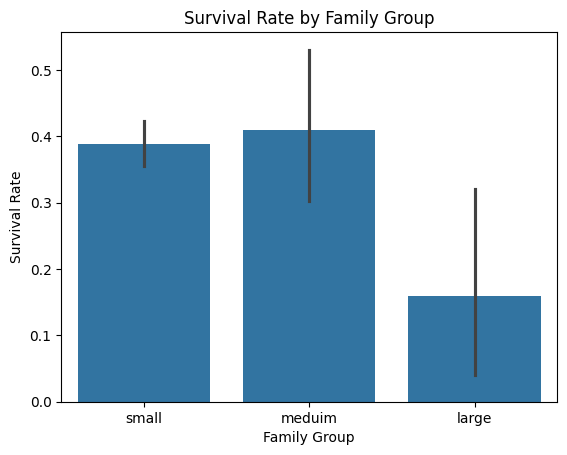

In [28]:
sns.barplot(x='Family_group', y='Survived', data=titanic, order=['small','meduim','large'])
plt.title("Survival Rate by Family Group")
plt.ylabel("Survival Rate")
plt.xlabel("Family Group")
plt.show()


Moderate family sizes had higher survival rates; passengers traveling alone had lower survival chances.

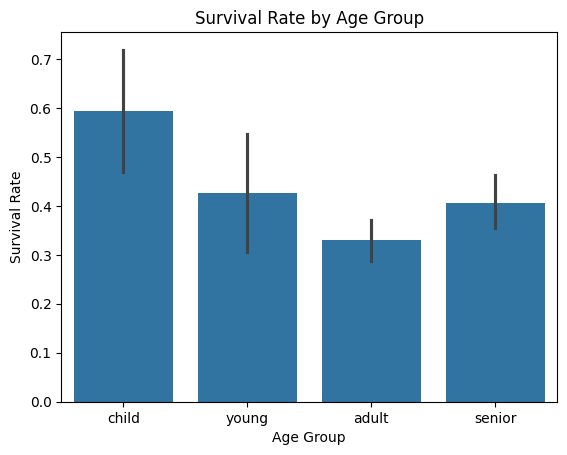

In [29]:
sns.barplot(x='Age_group', y='Survived', data=titanic, order=['child','young','adult','senior'])
plt.title("Survival Rate by Age Group")
plt.ylabel("Survival Rate")
plt.xlabel("Age Group")
plt.show()


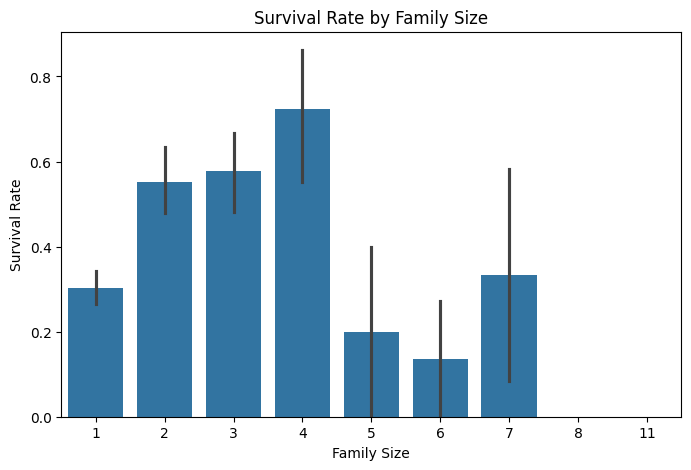

In [32]:
plt.figure(figsize=(8, 5))
sns.barplot(x='family_size', y='Survived', data=titanic)
plt.title('Survival Rate by Family Size')
plt.xlabel('Family Size')
plt.ylabel('Survival Rate')
plt.show()

Medium and Small families (2–4) had the highest survival.

Very large families had lower survival.